In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fonction taux de completion pour les colonnes années

In [2]:
data = pd.read_excel("Bureau/EdStatsEXCEL.xlsx")

In [3]:
def check_column_completion(column):
    na = data[column].isnull().sum()
    return (len(data[column])-na)*100/len(data[column])

In [4]:
years_int = [*range(1970,2018,1)]
years_str = [str(int) for int in years_int]
results = []

In [5]:
for year in years_str:
    print('-'*20)
    print(year)
    print(check_column_completion(year))
    results.append(check_column_completion(year))

--------------------
1970
8.150361358844554
--------------------
1971
4.006742358472484
--------------------
1972
4.015987732966525
--------------------
1973
4.007644346228
--------------------
1974
4.028502813074312
--------------------
1975
9.843617872887375
--------------------
1976
4.226150880001804
--------------------
1977
4.236410990720801
--------------------
1978
4.23663648765968
--------------------
1979
4.150158411599563
--------------------
1980
10.048369093389557
--------------------
1981
4.3720473994565525
--------------------
1982
4.229307837146111
--------------------
1983
4.336306134644222
--------------------
1984
4.352767411182393
--------------------
1985
10.180735796511563
--------------------
1986
4.439132738773071
--------------------
1987
4.356713607612777
--------------------
1988
4.346678993832659
--------------------
1989
4.232577542759857
--------------------
1990
14.0264733406244
--------------------
1991
8.392657819670099
--------------------
1992
8.517357

In [6]:
data_completion = pd.DataFrame(results, columns=["Taux de completion"])

In [7]:
data_completion.index = years_int

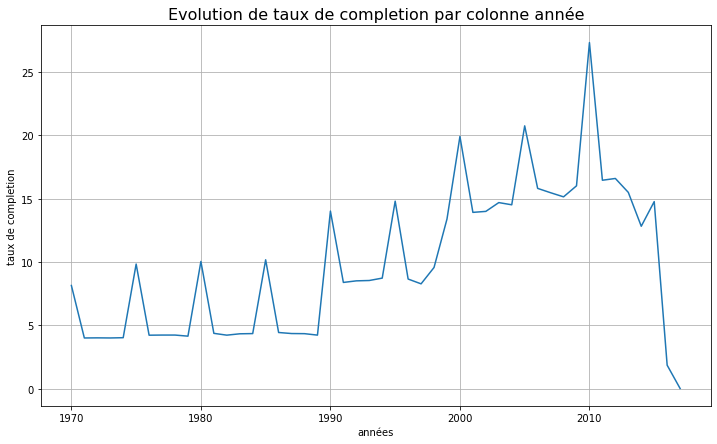

In [8]:
fig = plt.figure(figsize=(12,7))
plt.plot(data_completion)
plt.title("Evolution de taux de completion par colonne année", fontsize="16")
plt.xlabel("années")
plt.ylabel("taux de completion")
plt.grid()

## Fonction taux de completion et qualité d'un indicateur

In [9]:
def check_row_completion(indicator):
    mask = data[data['Indicator Name']==indicator]
    
    print("Taux de completion moyen")
    full_columns = mask.count(axis=1).values
    row_completion = (full_columns * 100 / len(data.columns)).round().astype(int)
    print(row_completion.mean().round(1),"%")
    print("-" * 20)
    
    print("Ecart type du taux de completion")
    print(row_completion.std().round(1))
    print("-" * 20)
    
    print("Taux de completion: valeur min")
    print(row_completion.min(),"%")
    print("-" * 20)
    
    print("Taux de completion: valeur max")
    print(row_completion.max(),"%")
    print("-" * 20)
    
    print("Taux de completion des colonnes 2010-2017")
    print((mask.loc[:,"2010":"2017"].count(axis=1).values * 100 / 8).mean().round(1),"%")
    print("-" * 20)
    
    print("Taux de completion des colonnes 2020-2100")
    print((mask.loc[:,"2020":"2100"].count(axis=1).values * 100 / len(mask.loc[:,"2020":"2100"].columns)).mean().round(1),"%")
    print("-" * 20)

In [10]:
# Get one column(date) for selected indicator
#d = data.loc[data['Indicator Name']=="Population growth (annual %)"]
#(d.loc[:,"2010":"2015":1].count(axis=1).values * 100 / 6).mean().round(1)

In [11]:
# Get all individus with that indicator
pop_growth = data[data['Indicator Name']=="Population growth (annual %)"]

In [12]:
df = pd.DataFrame(data[data['Indicator Name']=="Population growth (annual %)"].count(axis=1).values, columns=["Colonnes remplies"])
df['Taux de completion de la ligne'] = (df['Colonnes remplies'].values * 100 / len(data.columns)).round().astype(int)
df['Taux de completion de la ligne'].values.mean()

72.65702479338843

In [13]:
#pop_growth["1970":"1975"]
#check_row_completion("Population growth (annual %)")
#data[data['Indicator Name']=="Population growth (annual %)"].count(axis=1).values
#data[data['Indicator Name']=="Population growth (annual %)"].isnull().sum(axis=1).values.mean()
#data[data['Indicator Name']=="Population growth (annual %)"].isnull().sum(axis=1)
#len(data.columns)

In [14]:
check_row_completion("Population, ages 15-24, total")

Taux de completion moyen
34.2 %
--------------------
Ecart type du taux de completion
15.3
--------------------
Taux de completion: valeur min
6 %
--------------------
Taux de completion: valeur max
43 %
--------------------
Taux de completion des colonnes 2010-2017
56.1 %
--------------------
Taux de completion des colonnes 2020-2100
0.0 %
--------------------


## Creation du dataframe final

In [15]:
final_indicators = ["Population, total", "Population, ages 15-24, total", "Population growth (annual %)", "GDP at market prices (current US$)", "Government expenditure on education as % of GDP (%)", "Government expenditure in secondary institutions education as % of GDP (%)", "Government expenditure in tertiary institutions as % of GDP (%)", "Youth literacy rate, population 15-24 years, both sexes (%)", "Rate of out-of-school youth of upper secondary school age, both sexes (%)", "Enrolment in upper secondary education, both sexes (number)", "Percentage of enrolment in tertiary education in private institutions (%)", "Percentage of enrolment in secondary education in private institutions (%)", "Teachers in upper secondary education, both sexes (number)", "Teachers in tertiary education programmes, both sexes (number)", "Pupil-teacher ratio in upper secondary education (headcount basis)", "Internet users (per 100 people)"]

In [16]:
fd = pd.DataFrame()    #créer un new dataframe vide

In [17]:
#Moyenne entre 2010 et 2015 pour un indicateur
#data[data['Indicator Name']=="Population growth (annual %)"].loc[:,"2010":"2015"].mean(axis=1).round(2)

In [18]:
def create_final_dataframe(indicators, dataframe):
    for indicator in indicators:
        dataframe[indicator] = data[data['Indicator Name']==indicator].loc[:,"2010":"2017"].mean(axis=1).round(2).values
        print(indicator)

In [19]:
#recup les pays
fd.index = data['Country Name'].drop_duplicates().values

In [20]:
create_final_dataframe(final_indicators, fd)

Population, total
Population, ages 15-24, total
Population growth (annual %)
GDP at market prices (current US$)
Government expenditure on education as % of GDP (%)
Government expenditure in secondary institutions education as % of GDP (%)
Government expenditure in tertiary institutions as % of GDP (%)
Youth literacy rate, population 15-24 years, both sexes (%)
Rate of out-of-school youth of upper secondary school age, both sexes (%)
Enrolment in upper secondary education, both sexes (number)
Percentage of enrolment in tertiary education in private institutions (%)
Percentage of enrolment in secondary education in private institutions (%)
Teachers in upper secondary education, both sexes (number)
Teachers in tertiary education programmes, both sexes (number)
Pupil-teacher ratio in upper secondary education (headcount basis)
Internet users (per 100 people)


In [21]:
#Group two columns in one
fd["Dépenses dans les institutions secondaires et tertiaires (%PIB)"] = fd[["Government expenditure in secondary institutions education as % of GDP (%)","Government expenditure in tertiary institutions as % of GDP (%)"]].sum(axis=1)
fd["Pourcentage d'inscriptions dans des institutions privées"] = fd[["Percentage of enrolment in tertiary education in private institutions (%)","Percentage of enrolment in secondary education in private institutions (%)"]].mean(axis=1)
fd["Professeurs dans l'éducation secondaire et tertiaire"] = fd[["Teachers in upper secondary education, both sexes (number)","Teachers in tertiary education programmes, both sexes (number)"]].sum(axis=1)

In [22]:
#Drop columns after group
fd.drop(columns=["Government expenditure in secondary institutions education as % of GDP (%)","Government expenditure in tertiary institutions as % of GDP (%)"], inplace=True)
fd.drop(columns=["Percentage of enrolment in tertiary education in private institutions (%)","Percentage of enrolment in secondary education in private institutions (%)"], inplace=True)
fd.drop(columns=["Teachers in upper secondary education, both sexes (number)","Teachers in tertiary education programmes, both sexes (number)"], inplace=True)

In [23]:
#Rename columns
fd.rename(columns={"Population growth (annual %)": "Croissance de la population (%)", "Population, total": "Population totale", "Population, ages 15-24, total": "Population 15-24 ans", "GDP at market prices (current US$)": "PIB (US$)", "Government expenditure on education as % of GDP (%)": "Dépenses dans l'éducation (%PIB)", "Youth literacy rate, population 15-24 years, both sexes (%)": "Taux d'alphabétisme chez les 15-24 ans (%)", "Rate of out-of-school youth of upper secondary school age, both sexes (%)": "Déscolarisation des lycéens (%)", "Enrolment in upper secondary education, both sexes (number)": "Nombre d'inscriptions au lycée", "Pupil-teacher ratio in upper secondary education (headcount basis)": "Ratio élèves/professeurs au lycée", "Internet users (per 100 people)": "Accès à Internet (%)"}, inplace=True)

In [24]:
fd.to_excel('/home/kilian/dataframeP2.xlsx')

In [25]:
fd

,Population totale,Population 15-24 ans,Croissance de la population (%),PIB (US$),Dépenses dans l'éducation (%PIB),Taux d'alphabétisme chez les 15-24 ans (%),Déscolarisation des lycéens (%),Nombre d'inscriptions au lycée,Ratio élèves/professeurs au lycée,Accès à Internet (%),Dépenses dans les institutions secondaires et tertiaires (%PIB),Pourcentage d'inscriptions dans des institutions privées,Professeurs dans l'éducation secondaire et tertiaire
Arab World,3.587756e+08,NaN,2.11,2.545812e+12,NaN,88.96,42.26,11662032.40,13.08,31.83,0.00,7.77,1281962.35
East Asia & Pacific,2.250835e+09,NaN,0.68,2.071522e+13,NaN,99.00,24.59,69637812.80,16.40,43.75,0.00,16.39,7528864.10
East Asia & Pacific (excluding high income),2.007695e+09,NaN,0.72,1.137853e+13,NaN,98.97,26.10,62314336.00,17.06,38.97,0.00,15.54,6028258.67
Euro area,3.376978e+08,NaN,0.23,1.273876e+13,NaN,NaN,8.63,12966761.20,11.57,75.58,0.00,16.01,2151858.72
Europe & Central Asia,8.994497e+08,NaN,0.42,2.201291e+13,NaN,99.71,12.69,33884015.20,11.62,65.54,0.00,11.39,5545806.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),1.046797e+05,NaN,-0.51,3.971000e+09,NaN,NaN,NaN,NaN,NaN,45.31,0.00,NaN,0.00
West Bank and Gaza,4.174707e+06,965052.17,2.95,1.170280e+10,1.50,99.33,28.96,147944.40,17.72,48.68,0.00,46.22,16222.33
"Yemen, Rep.",2.558457e+07,5688935.83,2.61,3.538881e+10,NaN,NaN,60.89,642312.75,24.17,19.42,0.00,13.55,29040.33
Zambia,1.518298e+07,2891666.83,2.99,2.380621e+10,NaN,88.71,NaN,NaN,NaN,16.55,0.00,NaN,0.00
